In [23]:
import pandas as pd

nombre_columnas = ['E (eV)','P(E) (1/eV)']
df_bwater = pd.read_csv('chspect-BH2O.dat', sep='\s+', header=None, names=nombre_columnas)
df_wwater = pd.read_csv('chspect_UF4.dat', sep='\s+', header=None, names=nombre_columnas)
df_water = pd.read_csv('chspect-H2O.dat', sep='\s+', header=None, names=nombre_columnas)
df_p_conv = pd.read_csv('chspect_pconv.dat', sep='\s+', header=None, names=nombre_columnas)

df_bwater = df_bwater[(df_bwater['E (eV)']> 4.2e6) & (df_bwater['E (eV)']< 4.6e6)]
df_water = df_water[(df_water['E (eV)']> 4.2e6) & (df_water['E (eV)']< 4.6e6)]
df_wwater = df_wwater[(df_wwater['E (eV)']> 4.2e6) & (df_wwater['E (eV)']< 4.6e6)]
df_p_conv = df_p_conv[(df_p_conv['E (eV)']> 4.2e6) & (df_p_conv['E (eV)']< 4.6e6)]

In [29]:
nombre_columnas = ['E (eV)','P(E) (1/eV)', 'Stat_Uncert']
df_UF4_nconv = pd.read_csv('chspect_UF4_nconv.dat', sep='\s+', skiprows=5, header=None, names=nombre_columnas)
df_UF4_nconv = df_UF4_nconv[(df_UF4_nconv['E (eV)']> 4.2e6) & (df_UF4_nconv['E (eV)']< 4.6e6)]

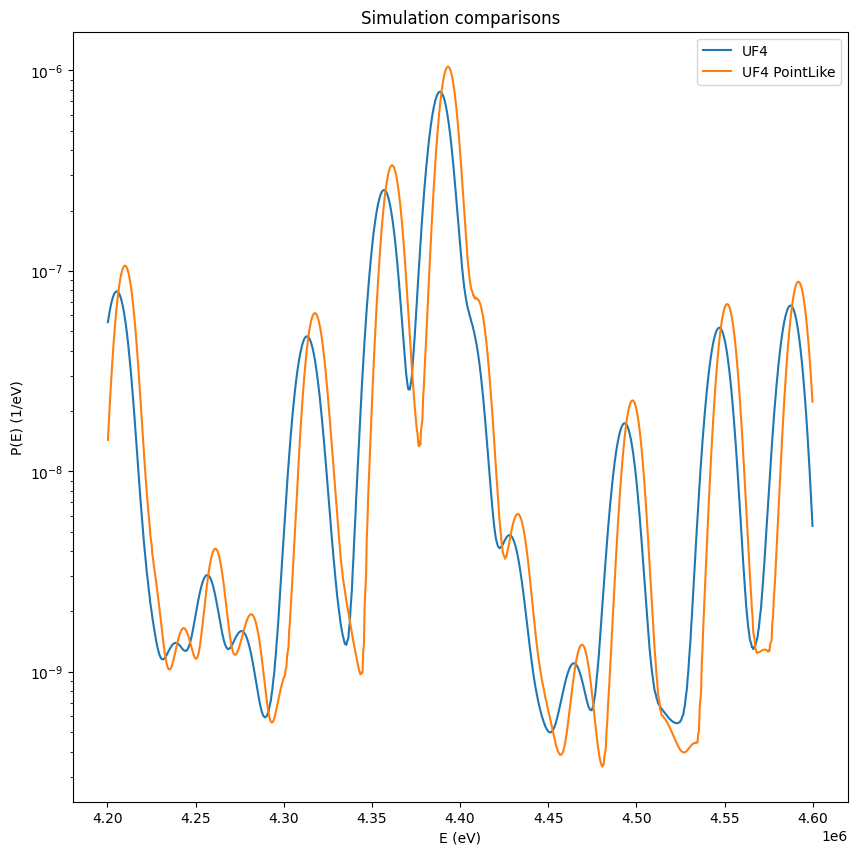

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')
plt.plot(df_p_conv['E (eV)'], df_p_conv['P(E) (1/eV)'], label='UF4 PointLike')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

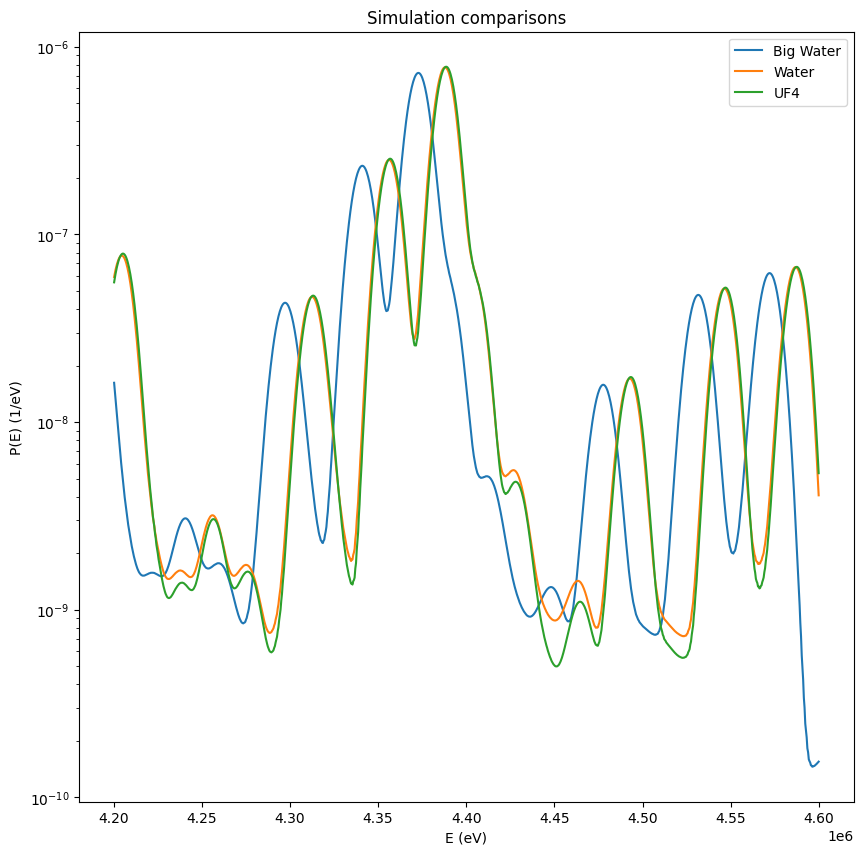

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(df_bwater['E (eV)'], df_bwater['P(E) (1/eV)'], label='Big Water')
plt.plot(df_water['E (eV)'], df_water['P(E) (1/eV)'], label='Water')
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()

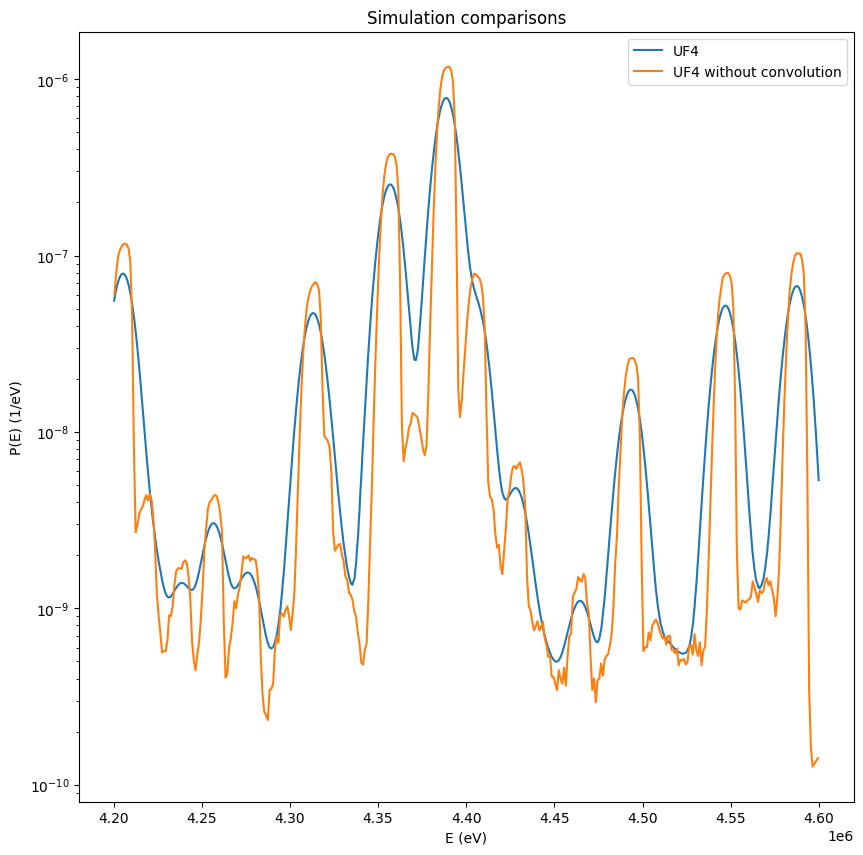

In [31]:
plt.figure(figsize=(10,10))
plt.plot(df_wwater['E (eV)'], df_wwater['P(E) (1/eV)'], label='UF4')
plt.plot(df_UF4_nconv['E (eV)'], df_UF4_nconv['P(E) (1/eV)'], label= 'UF4 without convolution')

plt.title('Simulation comparisons')
plt.xlabel('E (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')

plt.legend()

plt.show()